# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [65]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [75]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)
import auxiliares as aux
importlib.reload(aux)

<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [48]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

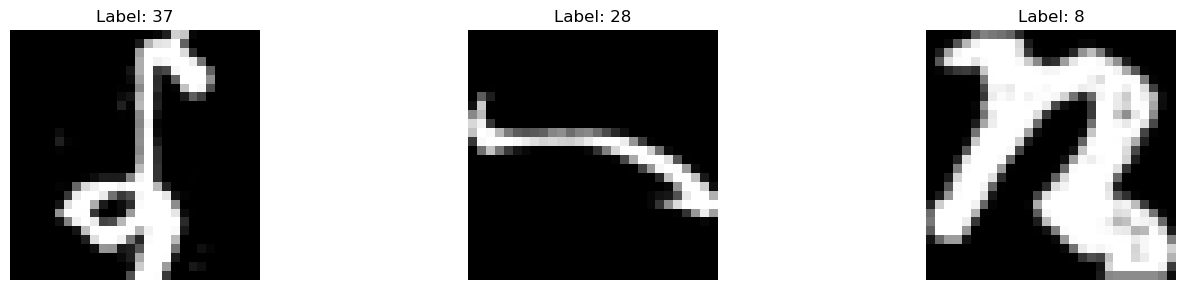

In [49]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [50]:
importlib.reload(ds)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = ds.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_normalized, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 3.954963997930839
loss val: 1.3208336049327856
Epoch 10, Loss: 3.7374996053973057
loss val: 1.2581443644904038
Epoch 20, Loss: 3.538056639365084
loss val: 1.202485898493236
Epoch 30, Loss: 3.3076434108579136
loss val: 1.136840027090011
Epoch 40, Loss: 3.0577293324011086
loss val: 1.0638195947451714
Epoch 50, Loss: 2.810985657265614
loss val: 0.9906932977464874
Epoch 60, Loss: 2.586505126454683
loss val: 0.9253179322347657
Epoch 70, Loss: 2.392011499060183
loss val: 0.8702073898643949
Epoch 80, Loss: 2.227359440928118
loss val: 0.824636624240589
Epoch 90, Loss: 2.0871743086577172
loss val: 0.7865870824351731
Epoch 100, Loss: 1.966536935037703
loss val: 0.7549852469311438
Epoch 110, Loss: 1.8620998364299424
loss val: 0.7289771232349035
Epoch 120, Loss: 1.7705165745031306
loss val: 0.7072964758017813
Epoch 130, Loss: 1.6893689541272303
loss val: 0.6890037080616274
Epoch 140, Loss: 1.6168688446481905
loss val: 0.6735922175968098
Epoch 150, Loss: 1.5517268831514421
loss val: 

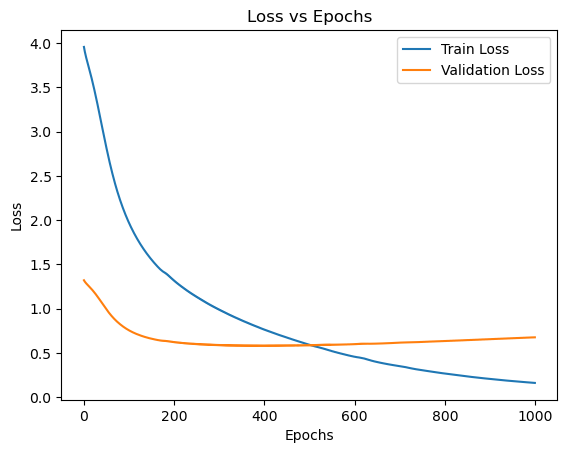

In [72]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5670
Cross Entropy: 2.0310


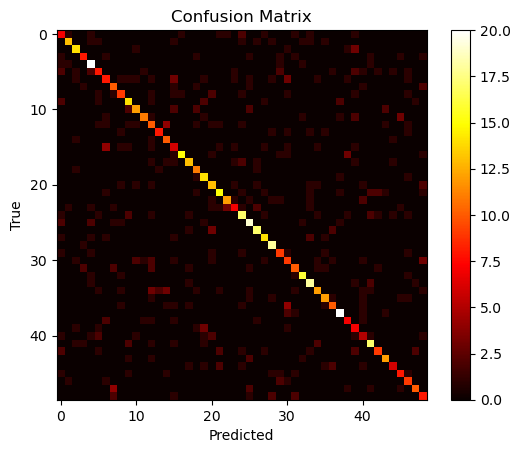

In [73]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [53]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9839544733431405
loss val: 1.3268360501094587
Epoch 10, Loss: 3.792780883566981
loss val: 1.2769738771465144
Epoch 20, Loss: 3.667718475012416
loss val: 1.2431997005130246
Epoch 30, Loss: 3.5267608108045376
loss val: 1.2047162087605516
Epoch 40, Loss: 3.3565732629921445
loss val: 1.1575379872841403
Epoch 50, Loss: 3.1586089173457257
loss val: 1.1014018593034611
Epoch 60, Loss: 2.9553821733146752
loss val: 1.0446042951782022
Epoch 70, Loss: 2.7601735430365006
loss val: 0.9898706341129107
Epoch 80, Loss: 2.5788457351696996
loss val: 0.9395210814525992
Epoch 90, Loss: 2.415657645776468
loss val: 0.8942331511598787
Epoch 100, Loss: 2.2713712087323397
loss val: 0.8554773150211776
Epoch 110, Loss: 2.1451718789443577
loss val: 0.8220320447530087
Epoch 120, Loss: 2.0347183377423512
loss val: 0.7934763655773557
Epoch 130, Loss: 1.9370397710093556
loss val: 0.768988272985567
Epoch 140, Loss: 1.8505929553008889
loss val: 0.7479395574206438
Epoch 150, Loss: 1.7733167837900656
loss

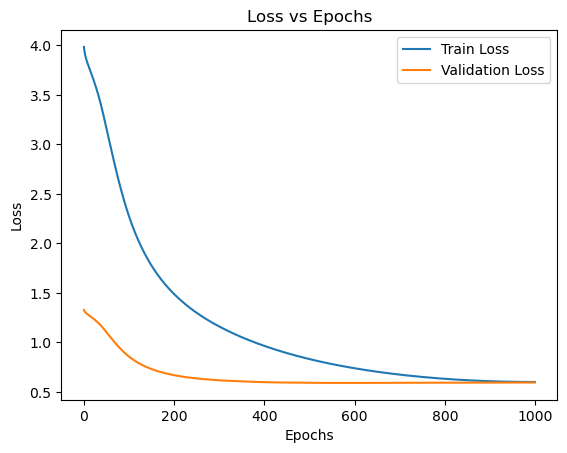

Accuracy: 0.5630
Cross Entropy: 1.7830


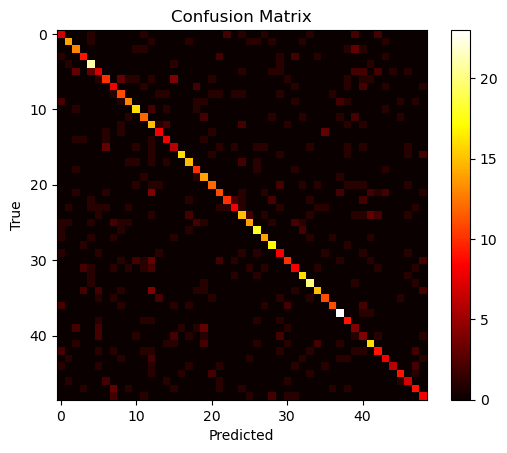

In [ ]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = 0.001
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Epoch 0, Loss: 3.2841793960891517
loss val: 1.1354553540711776
Epoch 10, Loss: 0.7492571353744534
loss val: 0.6099382502007543
Epoch 20, Loss: 0.2585935746823002
loss val: 0.6513904741972883
Epoch 30, Loss: 0.07140787789191463
loss val: 0.682597298126273
Epoch 40, Loss: 0.03182256187457347
loss val: 0.735009966509562
Epoch 50, Loss: 0.019361218847623624
loss val: 0.7708689878404696
Epoch 60, Loss: 0.013603255477224314
loss val: 0.7960108993671574
Epoch 70, Loss: 0.01034146881463586
loss val: 0.8173865329914813
Epoch 80, Loss: 0.008301736143896848
loss val: 0.8341024211467017
Epoch 90, Loss: 0.0068487865394505
loss val: 0.8492547286829288
Epoch 100, Loss: 0.005811421957388038
loss val: 0.8628190851685671
Epoch 110, Loss: 0.005036638505994098
loss val: 0.8735352153422893
Epoch 120, Loss: 0.004422926062897917
loss val: 0.8840047032658399
Epoch 130, Loss: 0.003939341803905647
loss val: 0.893068509691179
Epoch 140, Loss: 0.0035553902371043724
loss val: 0.9018054432477799
Epoch 150, Loss: 0.

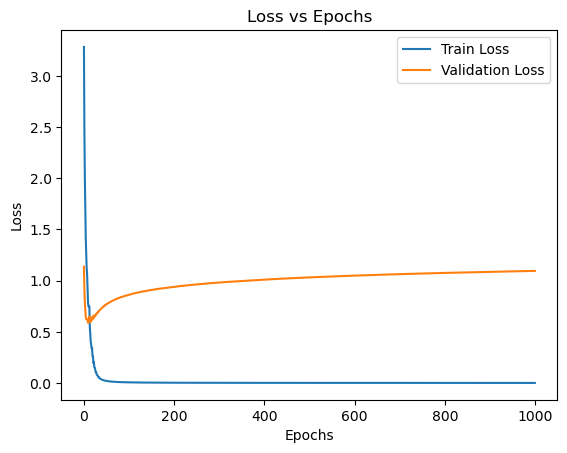

Accuracy: 0.5930
Cross Entropy: 3.4934


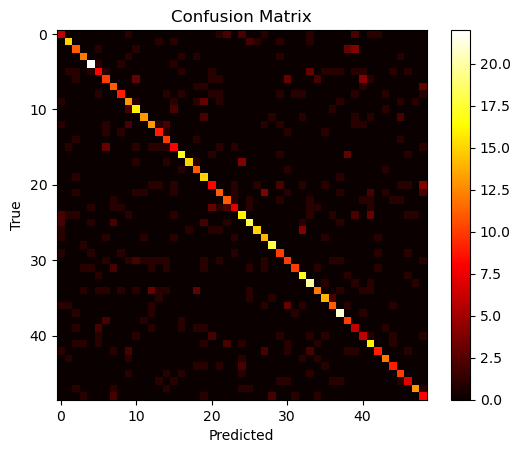

In [80]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = 64
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9206827135084126
loss val: 1.315523224888466
Epoch 10, Loss: 3.3312956884016147
loss val: 1.1537309055071625
Epoch 20, Loss: 2.649175960147115
loss val: 0.9733624028585568
Epoch 30, Loss: 2.0167035737653283
loss val: 0.8096701060749211
Epoch 40, Loss: 1.558438412227289
loss val: 0.70333494823897
Epoch 50, Loss: 1.230126402875852
loss val: 0.6433815317557386
Epoch 60, Loss: 0.9818205231465554
loss val: 0.6097784596828131
Epoch 70, Loss: 0.7872046872686523
loss val: 0.5914378193775451
Epoch 80, Loss: 0.6288066349133168
loss val: 0.5843340143411156
Epoch 90, Loss: 0.4989720260180424
loss val: 0.5843701962536846
Epoch 100, Loss: 0.39290641523250047
loss val: 0.5903720773248459
Epoch 110, Loss: 0.3077382094683112
loss val: 0.6014820799334336
Epoch 120, Loss: 0.24031020670571926
loss val: 0.615726901838656
Epoch 130, Loss: 0.187614503020723
loss val: 0.6318594047021503
Epoch 140, Loss: 0.1469866148718729
loss val: 0.6490174342740656
Epoch 150, Loss: 0.11590771957535846
loss 

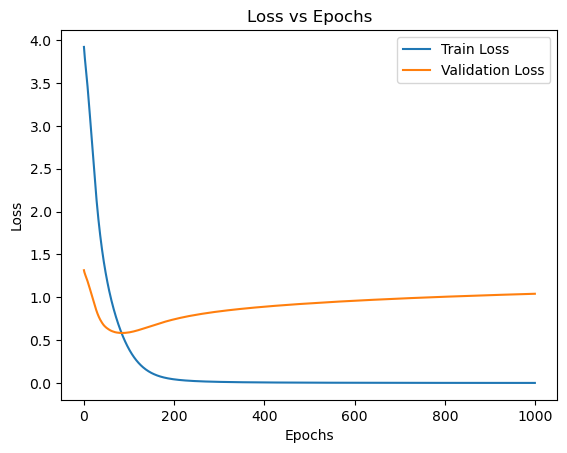

Accuracy: 0.5860
Cross Entropy: 3.2799


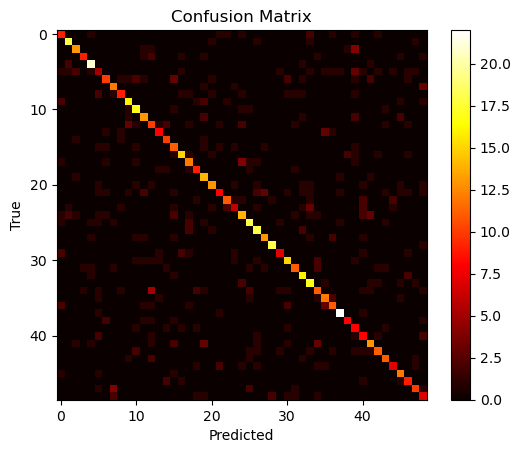

In [81]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = [0.9, 0.999, 1e-8]
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9906188111114855
loss val: 1.3327002890378612
Epoch 10, Loss: 3.773320264736053
loss val: 1.275197669826059
Epoch 20, Loss: 3.6187625319707193
loss val: 1.2337287949636777
Epoch 30, Loss: 3.4468349218770773
loss val: 1.1866323357729274
Epoch 40, Loss: 3.2519132465709175
loss val: 1.1330743603271596
Epoch 50, Loss: 3.037970602164368
loss val: 1.0741989559560063
Epoch 60, Loss: 2.8151936148497656
loss val: 1.011885714564555
Epoch 70, Loss: 2.6016356828682756
loss val: 0.9506984213320323
Epoch 80, Loss: 2.411984263559534
loss val: 0.8959492572495951
Epoch 90, Loss: 2.2454476962873193
loss val: 0.8487124041907907
Epoch 100, Loss: 2.1013399851087553
loss val: 0.8086515303015609
Epoch 110, Loss: 1.9755442183888867
loss val: 0.7749079190195918
Epoch 120, Loss: 1.8655715553526
loss val: 0.7466931038297656
Epoch 130, Loss: 1.769298728279511
loss val: 0.7232773248960903
Epoch 140, Loss: 1.6846028450214718
loss val: 0.7038976392464998
Epoch 150, Loss: 1.6092291532119591
loss val:

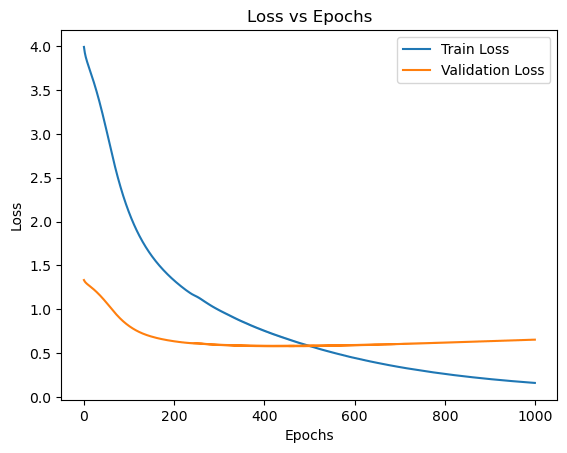

Accuracy: 0.6010
Cross Entropy: 1.9562


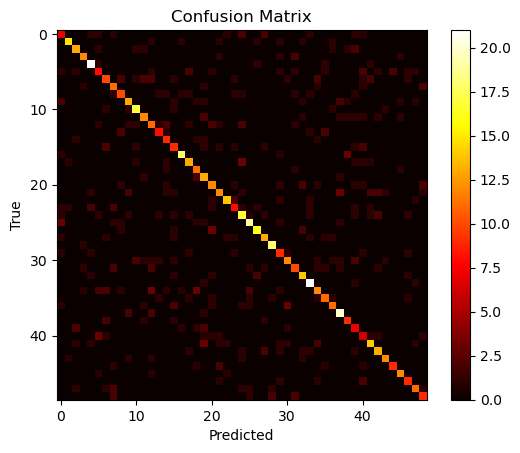

In [ ]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

In [ ]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9984413841739004
loss val: 1.334594816990543
Epoch 10, Loss: 3.808464113984518
loss val: 1.2795252699973216
Epoch 20, Loss: 3.6785934507771145
loss val: 1.2439480336861963
Epoch 30, Loss: 3.5297891750703103
loss val: 1.2022034692045287
Epoch 40, Loss: 3.3497493404243293
loss val: 1.1524200224016727
Epoch 50, Loss: 3.144089369962967
loss val: 1.0943191375335364
Epoch 60, Loss: 2.9210025713478367
loss val: 1.0298986722131638
Epoch 70, Loss: 2.6948150105165083
loss val: 0.9647550211206202
Epoch 80, Loss: 2.4813537130164343
loss val: 0.9036265632230881
Epoch 90, Loss: 2.294155113414815
loss val: 0.850490794527099


Epoch 0, Loss: 4.200751922341447
loss val: 1.385609896634686
Epoch 10, Loss: 3.9179135387732713
loss val: 1.3206532745857278
Epoch 20, Loss: 3.860914186204484
loss val: 1.2932227572386268
Epoch 30, Loss: 3.8175190347098864
loss val: 1.2871674844793786
Epoch 40, Loss: 3.8018651785018327
loss val: 1.275838293089952
Epoch 50, Loss: 3.766486004992007
loss val: 1.268661808748894
Epoch 60, Loss: 3.7353471080501075
loss val: 1.261557057358998
Epoch 70, Loss: 3.6964006645875163
loss val: 1.2580676423596764
Epoch 80, Loss: 3.657613432886359
loss val: 1.2416551570529317
Epoch 90, Loss: 3.628296640156732
loss val: 1.228188654064458
Epoch 100, Loss: 3.575239079376845
loss val: 1.2203568470435282
Epoch 110, Loss: 3.558155500175988
loss val: 1.220963983253906
Epoch 120, Loss: 3.490430495974637
loss val: 1.205608229867257
Epoch 130, Loss: 3.4629295132438687
loss val: 1.1930358822743672
Epoch 140, Loss: 3.409802988939259
loss val: 1.1865085338381764
Epoch 150, Loss: 3.3637267006444973
loss val: 1.1741

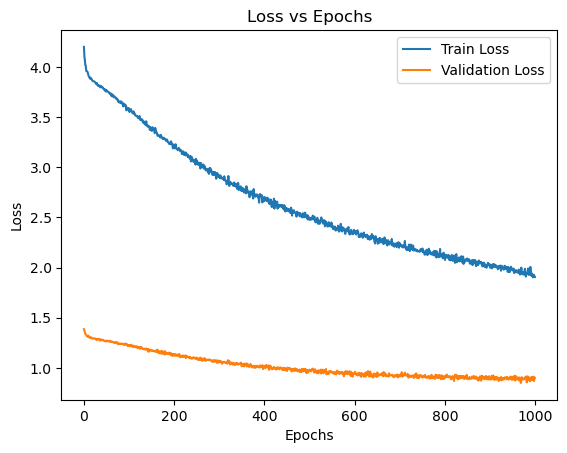

Accuracy: 0.5380
Cross Entropy: 1.9087


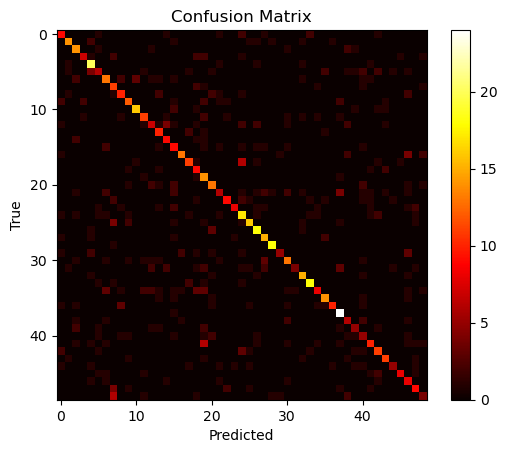

In [82]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 4.322590850330808
loss val: 1.4469082055726163
Epoch 10, Loss: 3.883209860868396
loss val: 1.3278398099554412
Epoch 20, Loss: 3.553759946114183
loss val: 1.2408545229525874
Epoch 30, Loss: 3.293703257011448
loss val: 1.1705426519494313
Epoch 40, Loss: 3.0928560901746556
loss val: 1.113002878427952
Epoch 50, Loss: 2.93976804814579
loss val: 1.0677500045690316
Epoch 60, Loss: 2.8273698424839937
loss val: 1.0337600887612384
Epoch 70, Loss: 2.751263687659962
loss val: 1.0093113983813247
Epoch 80, Loss: 2.7074037684559924
loss val: 0.99333276700593
Epoch 90, Loss: 2.6852799880092415
loss val: 0.9837896119427078
Epoch 100, Loss: 2.6798165753889385
loss val: 0.979387231182777
Epoch 110, Loss: 2.6864768713388276
loss val: 0.9788221162370973
Epoch 120, Loss: 2.701633505307087
loss val: 0.9814044510204771
Epoch 130, Loss: 2.72043879462645
loss val: 0.9850350486894792
Epoch 140, Loss: 2.7406492995279956
loss val: 0.9896543706061139
Epoch 150, Loss: 2.7613668163282923
loss val: 0.99

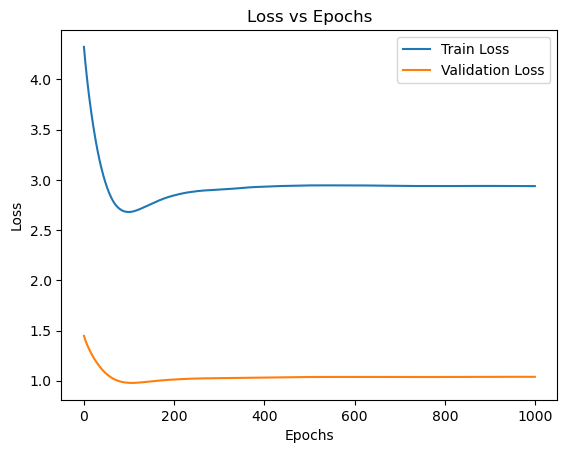

Accuracy: 0.2210
Cross Entropy: 3.1089


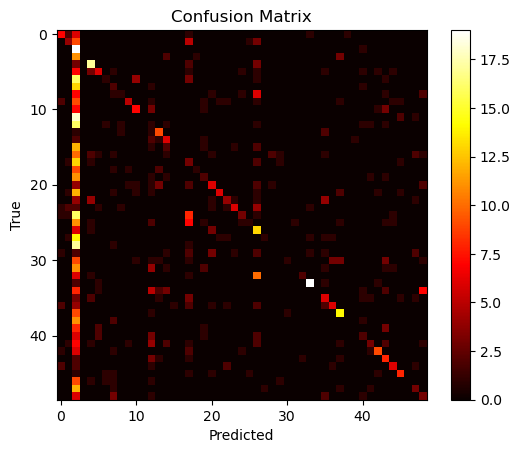

In [76]:
# batch normalization
mejoras = {}
mejoras["Batch normalization"] = 0.9
batch_norm = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejoras)
get_metrics = mt.get_metrics(batch_norm.forward_pass(X_val, False), y_val)

Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1

In [ ]:
# grid search
# definimos hiperparametros a probar 
importlib.reload(md)
importlib.reload(ds)
importlib.reload(mt)
importlib.reload(aux)

learning_rates = [0.001, 0.01, 0.1]
adam_betas = [(0.9, 0.999, 1e-8), (0.8, 0.999, 1e-8), (0.9, 0.99, 1e-8), None]
rsl = [0.001, 0.01, None]
batch_size = [32, 64, None]
l2_lambda = [0.0001, 0.001, None]
early_stopping_patience = [5, None]
dropout = [0.8, 0.5, None]

# Arquitecturas posibles (ejemplos)
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]

importlib.reload(aux)
aux.grid_search()